In [2]:
# Please look at this page:https://freese.gitbook.io/swan/tutorials/analysis_tools#is

# !pip install swan_vis
import swan_vis as swan

# initialize a new SwanGraph
sg = swan.SwanGraph()


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import ann

In [5]:
%%bash
mkdir figures

# download files
wget https://zenodo.org/record/8118614/files/data.tgz

# expand files
tar -xzf data.tgz


mkdir: figures: File exists
--2025-12-14 22:52:58--  https://zenodo.org/record/8118614/files/data.tgz
Resolving zenodo.org (zenodo.org)... 188.185.43.153, 188.185.48.75, 137.138.52.235
Connecting to zenodo.org (zenodo.org)|188.185.43.153|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/8118614/files/data.tgz [following]
--2025-12-14 22:52:58--  https://zenodo.org/records/8118614/files/data.tgz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 678423660 (647M) [application/octet-stream]
Saving to: ‘data.tgz.1’

     0K .......... .......... .......... .......... ..........  0%  338K 32m38s
    50K .......... .......... .......... .......... ..........  0% 1,27M 20m33s
   100K .......... .......... .......... .......... ..........  0% 1,82M 15m40s
   150K .......... .......... .......... .......... ..........  0% 24,0M 11m52s
   200K .......... .......... .......... .......... .........

Process is interrupted.


In [5]:
sg = swan.SwanGraph(sc=True)
annot_gtf = 'data/gencode.v29.annotation.gtf'
data_gtf = 'data/all_talon_observedOnly.gtf'
ab_file = 'data/all_talon_abundance_filtered.tsv'
talon_db = 'data/talon.db'
adata_file = 'data/swan_anndata.h5ad'
pass_list = 'data/all_pass_list.csv'
meta = 'data/metadata.tsv'


In [6]:
# add an annotation transcriptome
sg.add_annotation(annot_gtf)
# add a dataset's transcriptome to the SwanGraph
sg.add_transcriptome(data_gtf)
# add each dataset's abundance information to the SwanGraph
sg.add_abundance(ab_file)
# add abundance for each dataset from the AnnData into the SwanGraph
sg = swan.SwanGraph()
sg.add_annotation(annot_gtf)
sg.add_transcriptome(data_gtf)
sg.add_adata(adata_file)



Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph


/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/swangraph.py:366: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X



Adding abundance for datasets hepg2_1, hepg2_2, hffc6_1, hffc6_2, hffc6_3 to SwanGraph.
Calculating TPM...
Calculating edge usage...


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Calculating TES usage...

Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(



Adding abundance for datasets hepg2_1, hepg2_2, hffc6_1, hffc6_2, hffc6_3 to SwanGraph.
Calculating TPM...
Calculating PI...
Calculating edge usage...


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Calculating TES usage...


In [7]:
# add gene-level abundance to the SwanGraph
sg.add_abundance(ab_file, how='gene')



Adding abundance for datasets hepg2_1, hepg2_2, hffc6_1, hffc6_2, hffc6_3 to SwanGraph.
Calculating TPM...


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/swangraph.py:366: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X


In [8]:
# save the SwanGraph as a Python pickle file
sg.save_graph('data/swan')
# load up a saved SwanGraph from a pickle file
sg = swan.read('data/swan.p')


Saving graph as data/swan.p
Read in graph from data/swan.p


In [9]:
# for this new example, create a new empty SwanGraph
sg = swan.SwanGraph()

# and add the annotation transcriptome to it
sg.add_annotation(annot_gtf)

# add transcriptome from TALON db
sg.add_transcriptome(talon_db, pass_list=pass_list)

# add each dataset's abundance information to the SwanGraph
sg.add_abundance(ab_file)



Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph


/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/swangraph.py:366: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X



Adding abundance for datasets hepg2_1, hepg2_2, hffc6_1, hffc6_2, hffc6_3 to SwanGraph.
Calculating TPM...
Calculating PI...
Calculating edge usage...


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Calculating TES usage...


In [10]:
sg = swan.read('data/swan.p')
sg.add_metadata(meta)


Read in graph from data/swan.p


/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:750: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:750: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:750: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/Users/melike/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:750: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inf

In [11]:
sg.adata.obs


,cell_line,replicate,dataset,total_counts,description
index,,,,,
hepg2_1,hepg2,1,hepg2_1,499647.0,liver
hepg2_2,hepg2,2,hepg2_2,848447.0,liver
hffc6_1,hffc6,1,hffc6_1,761493.0,fibroblast
hffc6_2,hffc6,2,hffc6_2,787967.0,fibroblast
hffc6_3,hffc6,3,hffc6_3,614921.0,fibroblast


In [12]:
# look at valid metadata options
sg.adata.obs


,cell_line,replicate,dataset,total_counts,description
index,,,,,
hepg2_1,hepg2,1,hepg2_1,499647.0,liver
hepg2_2,hepg2,2,hepg2_2,848447.0,liver
hffc6_1,hffc6,1,hffc6_1,761493.0,fibroblast
hffc6_2,hffc6,2,hffc6_2,787967.0,fibroblast
hffc6_3,hffc6,3,hffc6_3,614921.0,fibroblast


In [ ]:
# find genes that exhibit DIE between HFFc6 and HepG2
obs_col = 'cell_line'
obs_conditions = ['hepg2', 'hffc6']
die_table, die_results = sg.die_gene_test(obs_col=obs_col,
                                          obs_conditions=obs_conditions,
                                          verbose=True)


Testing for DIE for each gene:   0%|                  | 0/14684 [00:00<?, ?it/s]/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:   1%|        | 77/14684 [00:00<00:56, 258.67it/s]/Users/melike/anaconda3/lib/python3.11/site-packages/swan_vis/utils.py:993: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  chi_table = gene_df[counts_cols].to_numpy()
Testing for DIE for each gene:   1%|       | 137/14684 [00:00<00:51, 281.29it/s]/Users/melike/anaconda3/lib/python

In [ ]:
# die_iso - isoform level differential isoform expression test results
uns_key = swan.make_uns_key('die',
                            obs_col=obs_col,
                            obs_conditions=obs_conditions)
test = sg.adata.uns[uns_key]
test.head(2)



In [ ]:
die_table.head()


In [ ]:
test = sg.get_die_genes(obs_col=obs_col, obs_conditions=obs_conditions,
                       p=0.05)


test.head()


In [ ]:
test.to_csv("test.csv", index=False)


In [13]:
# this is just to display saved images
from IPython.display import display, Image


In [14]:
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('data/swan.p')


Read in graph from data/swan.p


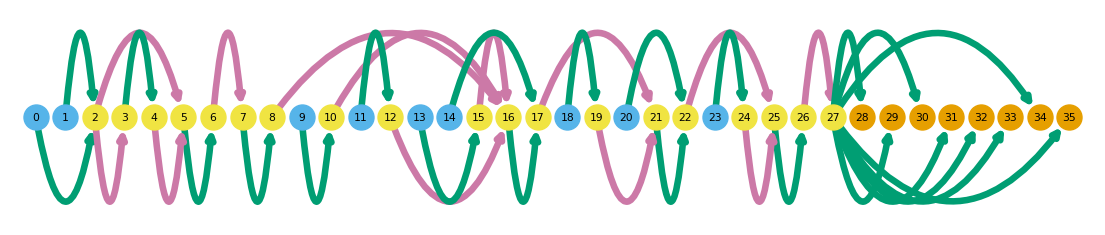

In [17]:
# plot a gene summary graph for the given gene
sg.plot_graph('UCK2')


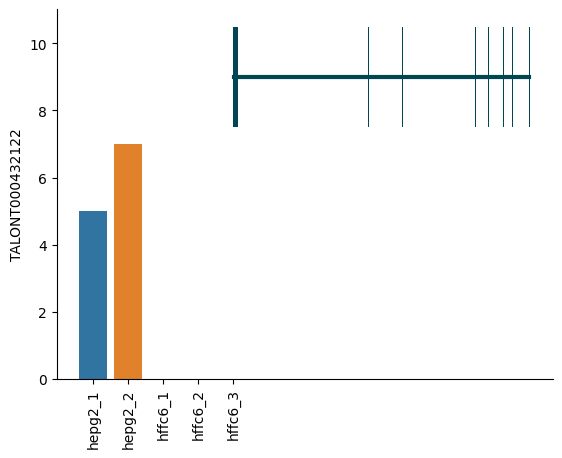

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# plot bar plot of one isoform by cell line and show the isoform with it
tid = 'TALONT000432122'
adata_copy = sg.adata[:, [tid]].copy()
data = adata_copy.X.todense()
obs_ind = adata_copy.obs.index.tolist()
var_ind = adata_copy.var.index.tolist()
df = pd.DataFrame(data=data, columns=var_ind, index=obs_ind)
df.reset_index(inplace=True)
ax = sns.barplot(data=df,
                 x='index',
                 y=tid)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('')

ax = sg.plot_browser(tid,
                     h=3,
                     w=10,
                     ax=ax,
                     y=7.5,
                     x=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
